<a href="https://colab.research.google.com/github/ceciliabelem/telecomx_br/blob/main/telecomx_br.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracão

In [18]:
import pandas as pd
import json

In [19]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json'

In [20]:
dados = pd.read_json(url)
dados.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformação

In [21]:
from pandas import json_normalize

# Normalizar a coluna 'customer'
customer_df = json_normalize(dados['customer'])
customer_df.columns = [f'customer_{col}' for col in customer_df.columns]

# Normalizar a coluna 'phone'
phone_df = json_normalize(dados['phone'])
phone_df.columns = [f'phone_{col}' for col in phone_df.columns]

# Normalizar a coluna 'internet'
internet_df = json_normalize(dados['internet'])
internet_df.columns = [f'internet_{col}' for col in internet_df.columns]

# Normalizar a coluna 'account'
account_df = json_normalize(dados['account'])
account_df.columns = [f'account_{col}' for col in account_df.columns]

# Concatenar os novos dataframes com o dataframe original e remover as colunas aninhadas
dados = pd.concat([dados.drop(['customer', 'phone', 'internet', 'account'], axis=1),
                   customer_df, phone_df, internet_df, account_df], axis=1)

# Exibir as primeiras linhas do dataframe transformado
print(dados.head())

# Exibir informações sobre o dataframe transformado para verificar as novas colunas
dados.info()

   customerID Churn  ... account_Charges.Monthly  account_Charges.Total
0  0002-ORFBO    No  ...                    65.6                  593.3
1  0003-MKNFE    No  ...                    59.9                  542.4
2  0004-TLHLJ   Yes  ...                    73.9                 280.85
3  0011-IGKFF   Yes  ...                    98.0                1237.85
4  0013-EXCHZ   Yes  ...                    83.9                  267.4

[5 rows x 21 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null 

In [22]:
print("Dimensões:", dados.shape)

dados.info()

print(dados.iloc[0])


Dimensões: (7267, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport      

In [23]:
dados.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [24]:
#Verificar se existem dados nulos
dados.isnull().sum()


,0
customerID,0
Churn,0
customer_gender,0
customer_SeniorCitizen,0
customer_Partner,0
customer_Dependents,0
customer_tenure,0
phone_PhoneService,0
phone_MultipleLines,0
internet_InternetService,0


In [25]:
#verificar se existem dados duplicados
dados.duplicated().sum()

np.int64(0)

In [53]:
# --- 1. Verificação de Valores Inválidos ou Inesperados ---

print("--- Verificação de Valores Inválidos ou Inesperados ---")

# Mover a conversão de 'account_Charges.Total' para antes das verificações numéricas
try:
    # Substituir strings vazias ou espaços em branco por NaN antes de converter para numérico
    dados['account_Charges.Total'] = dados['account_Charges.Total'].replace(r'^\s*$', pd.NA, regex=True)
    dados['account_Charges.Total'] = pd.to_numeric(dados['account_Charges.Total'])
    print("Coluna 'account_Charges.Total' convertida para numérica antes da verificação.")
except ValueError as e:
    print(f"Erro ao converter a coluna 'account_Charges.Total': {e}")
    print("Verifique se há outros caracteres não numéricos.")


# Colunas Categóricas (com value_counts)
categorical_cols = ['Churn', 'customer_gender', 'customer_SeniorCitizen', 'customer_Partner',
                    'customer_Dependents', 'phone_PhoneService', 'phone_MultipleLines',
                    'internet_InternetService', 'internet_OnlineSecurity', 'internet_OnlineBackup',
                    'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV',
                    'internet_StreamingMovies', 'account_Contract', 'account_PaperlessBilling',
                    'account_PaymentMethod']

for col in categorical_cols:
    print(f"\nValores para a coluna: {col}")
    print(dados[col].value_counts(dropna=False)) # dropna=False para incluir contagem de NaN
    print("-" * 30)

# Colunas Numéricas (com describe e verificação de valores inesperados)
# Inclua 'account_Charges.Total' aqui APÓS a conversão
numeric_cols = ['customer_tenure', 'account_Charges.Monthly', 'account_Charges.Total']

for col in numeric_cols:
    print(f"\nEstatísticas descritivas para a coluna: {col}")
    print(dados[col].describe())
    print("-" * 30)

    # Verificando se há valores negativos em colunas onde não deveriam existir
    # Agora isso deve funcionar, pois 'account_Charges.Total' foi convertido
    if (dados[col] < 0).any():
        print(f"Atenção: Valores negativos encontrados na coluna {col}")
        print(dados[dados[col] < 0].head())
        print("-" * 30)

# --- 2. Verificação de Tipos de Dados Incorretos ---
# O restante do código permanece similar, mas a conversão de account_Charges.Total não precisa ser repetida aqui
print("\n--- Verificação de Tipos de Dados Incorretos ---")
print(dados.info())

# Conversão de colunas 'Yes'/'No' ou 1/0 para booleano (mantenha esta parte)
boolean_map = {'Yes': True, 'No': False, 1: True, 0: False}
boolean_cols = ['customer_SeniorCitizen', 'customer_Partner', 'customer_Dependents',
                'phone_PhoneService', 'phone_MultipleLines', 'internet_OnlineSecurity',
                'internet_OnlineBackup', 'internet_DeviceProtection', 'internet_TechSupport',
                'internet_StreamingTV', 'internet_StreamingMovies', 'account_PaperlessBilling']

for col in boolean_cols:
    if col in dados.columns: # Verificar se a coluna existe
        dados[col] = dados[col].map(boolean_map)
        print(f"Coluna '{col}' mapeada para booleano (True/False).")

# Exemplo 3: Verificar se o Total Charges faz sentido em relação ao Monthly Charges e Tenure
# Pode haver pequenas diferenças devido a arredondamentos ou promoções, mas grandes discrepâncias podem ser inconsistências.
# Vamos verificar casos onde Total Charges é menor que Monthly Charges, a menos que Tenure seja 0
inconsistencias_cobranca = dados[(dados['account_Charges.Total'].notna()) &
                                (dados['account_Charges.Monthly'].notna()) &
                                (dados['customer_tenure'] > 0) &
                                (dados['account_Charges.Total'] < dados['account_Charges.Monthly'])]

if not inconsistencias_cobranca.empty:
    print("Inconsistências: Total Charges menor que Monthly Charges para Tenure > 0.")
    print(inconsistencias_cobranca[['customer_tenure', 'account_Charges.Monthly', 'account_Charges.Total']].head())
else:
    print("Nenhuma inconsistência lógica aparente nas cobranças (exceto para tenure 0).")
print("-" * 30)

# --- 4. Verificação de Formato Inconsistente ---

print("\n--- Verificação de Formato Inconsistente ---")

# A coluna 'customerID' é a mais provável de ter um formato específico
# Vamos verificar se todos os customerID são strings e não estão vazios
inconsistencias_customerid = dados[(dados['customerID'].isnull()) | (dados['customerID'] == '') | (dados['customerID'].apply(lambda x: not isinstance(x, str)))]

if not inconsistencias_customerid.empty:
    print(f"Encontradas {len(inconsistencias_customerid)} inconsistências de formato na coluna 'customerID' (NaN, vazio ou não string).")
    print(inconsistencias_customerid[['customerID']].head())
else:
    print("Nenhuma inconsistência de formato aparente na coluna 'customerID'.")
print("-" * 30)

--- Verificação de Valores Inválidos ou Inesperados ---
Coluna 'account_Charges.Total' convertida para numérica antes da verificação.

Valores para a coluna: Churn
Churn
No     5163
Yes    1869
Name: count, dtype: int64
------------------------------

Valores para a coluna: customer_gender
customer_gender
Male      3549
Female    3483
Name: count, dtype: int64
------------------------------

Valores para a coluna: customer_SeniorCitizen
customer_SeniorCitizen
False    5890
True     1142
Name: count, dtype: int64
------------------------------

Valores para a coluna: customer_Partner
customer_Partner
False    3639
True     3393
Name: count, dtype: int64
------------------------------

Valores para a coluna: customer_Dependents
customer_Dependents
False    4933
True     2099
Name: count, dtype: int64
------------------------------

Valores para a coluna: phone_PhoneService
phone_PhoneService
True     6352
False     680
Name: count, dtype: int64
------------------------------

Valores par

In [54]:
import numpy as np

# Substituir strings vazias ('') e/ou espaços em branco (' ') na coluna 'Churn' por np.nan
dados['Churn'] = dados['Churn'].replace('', np.nan)
dados['Churn'] = dados['Churn'].replace(' ', np.nan)


print("\nVerificando valores em 'Churn' após substituir espaços em branco/vazios por NaN:")
print(dados['Churn'].value_counts(dropna=False))

# Remover as linhas onde a coluna 'Churn' tem valores ausentes (que agora são np.nan)
# Usando inplace=True para modificar o DataFrame original
dados.dropna(subset=['Churn'], inplace=True)

# Verificar novamente para confirmar a remoção
print("\nVerificando valores ausentes na coluna 'Churn' após a remoção:")
print(dados['Churn'].value_counts(dropna=False))
print(f"\nNúmero de linhas após remover NaNs em Churn: {len(dados)}")


Verificando valores em 'Churn' após substituir espaços em branco/vazios por NaN:
Churn
No     5163
Yes    1869
Name: count, dtype: int64

Verificando valores ausentes na coluna 'Churn' após a remoção:
Churn
No     5163
Yes    1869
Name: count, dtype: int64

Número de linhas após remover NaNs em Churn: 7032


In [31]:
# Verificar as colunas de serviço de internet adicional para clientes sem InternetService
clientes_sem_internet = dados[dados['internet_InternetService'] == 'No']

print("\nValores das colunas de internet adicional para clientes sem InternetService:")
print(clientes_sem_internet[['internet_OnlineSecurity', 'internet_OnlineBackup',
                             'internet_DeviceProtection', 'internet_TechSupport',
                             'internet_StreamingTV', 'internet_StreamingMovies']].isnull().sum())


Valores das colunas de internet adicional para clientes sem InternetService:
internet_OnlineSecurity      1526
internet_OnlineBackup        1526
internet_DeviceProtection    1526
internet_TechSupport         1526
internet_StreamingTV         1526
internet_StreamingMovies     1526
dtype: int64


In [32]:
print("\nContagem total de NaNs por coluna:")
print(dados.isnull().sum())

print("\nNúmero de linhas com pelo menos um NaN em qualquer coluna:")
print(dados.isnull().any(axis=1).sum())


Contagem total de NaNs por coluna:
customerID                      0
Churn                           0
customer_gender                 0
customer_SeniorCitizen          0
customer_Partner                0
customer_Dependents             0
customer_tenure                 0
phone_PhoneService              0
phone_MultipleLines           682
internet_InternetService        0
internet_OnlineSecurity      1526
internet_OnlineBackup        1526
internet_DeviceProtection    1526
internet_TechSupport         1526
internet_StreamingTV         1526
internet_StreamingMovies     1526
account_Contract                0
account_PaperlessBilling        0
account_PaymentMethod           0
account_Charges.Monthly         0
account_Charges.Total          11
dtype: int64

Número de linhas com pelo menos um NaN em qualquer coluna:
2211


In [33]:
# Verificar a coluna MultipleLines para clientes sem PhoneService
clientes_sem_telefone = dados[dados['phone_PhoneService'] == False]
print("\nValores da coluna MultipleLines para clientes sem PhoneService:")
print(clientes_sem_telefone['phone_MultipleLines'].isnull().sum())


Valores da coluna MultipleLines para clientes sem PhoneService:
682


In [35]:
# Remover linhas com NaNs na coluna 'account_Charges.Total'
dados.dropna(subset=['account_Charges.Total'], inplace=True)
print(f"\nNúmero de linhas após remover NaNs em account_Charges.Total: {len(dados)}")
print(dados.isnull().sum()['account_Charges.Total']) # Verificar se zerou


Número de linhas após remover NaNs em account_Charges.Total: 7032
0


In [37]:
# Exemplo: Imputar NaNs em 'account_Charges.Total' com a mediana
mediana_total_charges = dados['account_Charges.Total'].median()
dados['account_Charges.Total'].fillna(mediana_total_charges, inplace=True)
print(dados.isnull().sum()['account_Charges.Total']) # Verificar se zerou

0


/tmp/ipython-input-37-752940772.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dados['account_Charges.Total'].fillna(mediana_total_charges, inplace=True)


In [38]:
print("\nContagem final de NaNs por coluna:")
print(dados.isnull().sum())

print("\nNúmero final de linhas com pelo menos um NaN em qualquer coluna:")
print(dados.isnull().any(axis=1).sum())


Contagem final de NaNs por coluna:
customerID                      0
Churn                           0
customer_gender                 0
customer_SeniorCitizen          0
customer_Partner                0
customer_Dependents             0
customer_tenure                 0
phone_PhoneService              0
phone_MultipleLines           680
internet_InternetService        0
internet_OnlineSecurity      1520
internet_OnlineBackup        1520
internet_DeviceProtection    1520
internet_TechSupport         1520
internet_StreamingTV         1520
internet_StreamingMovies     1520
account_Contract                0
account_PaperlessBilling        0
account_PaymentMethod           0
account_Charges.Monthly         0
account_Charges.Total           0
dtype: int64

Número final de linhas com pelo menos um NaN em qualquer coluna:
2200


In [56]:
# Colunas com NaNs logicamente explicados
logically_missing_cols = ['phone_MultipleLines', 'internet_OnlineSecurity',
                          'internet_OnlineBackup', 'internet_DeviceProtection',
                          'internet_TechSupport', 'internet_StreamingTV',
                          'internet_StreamingMovies']

# Termo para substituir os NaNs logic
fill_term = 'Sem Serviço'

for col in logically_missing_cols:
    # Verificar se a coluna ainda tem NaNs antes de preencher
    if dados[col].isnull().any():
        dados[col].fillna(fill_term, inplace=True)
        print(f"NaNs na coluna '{col}' preenchidos com '{fill_term}'.")
    else:
        print(f"Coluna '{col}' não possui NaNs.")

# Opcional: Verificar os valores únicos e contagens após o preenchimento
print("\nVerificando valores após preencher NaNs logicamente explicados:")
for col in logically_missing_cols:
    print(f"\nValores para a coluna: {col}")
    print(dados[col].value_counts(dropna=False)) # dropna=False ainda útil para garantir que não sobrou nenhum NaN
    print("-" * 30)

print("\n--- Tipos de Dados após preencher NaNs ---")
dados.info()

Coluna 'phone_MultipleLines' não possui NaNs.
Coluna 'internet_OnlineSecurity' não possui NaNs.
Coluna 'internet_OnlineBackup' não possui NaNs.
Coluna 'internet_DeviceProtection' não possui NaNs.
Coluna 'internet_TechSupport' não possui NaNs.
Coluna 'internet_StreamingTV' não possui NaNs.
Coluna 'internet_StreamingMovies' não possui NaNs.

Verificando valores após preencher NaNs logicamente explicados:

Valores para a coluna: phone_MultipleLines
phone_MultipleLines
False          3385
True           2967
Sem Serviço     680
Name: count, dtype: int64
------------------------------

Valores para a coluna: internet_OnlineSecurity
internet_OnlineSecurity
False          3497
True           2015
Sem Serviço    1520
Name: count, dtype: int64
------------------------------

Valores para a coluna: internet_OnlineBackup
internet_OnlineBackup
False          3087
True           2425
Sem Serviço    1520
Name: count, dtype: int64
------------------------------

Valores para a coluna: internet_Device

In [42]:
print("\n--- Verificação final dos Tipos de Dados ---")
dados.info()


--- Verificação final dos Tipos de Dados ---
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   customerID                 7032 non-null   object  
 1   Churn                      7032 non-null   category
 2   customer_gender            7032 non-null   category
 3   customer_SeniorCitizen     7032 non-null   bool    
 4   customer_Partner           7032 non-null   bool    
 5   customer_Dependents        7032 non-null   bool    
 6   customer_tenure            7032 non-null   int64   
 7   phone_PhoneService         7032 non-null   bool    
 8   phone_MultipleLines        7032 non-null   object  
 9   internet_InternetService   7032 non-null   category
 10  internet_OnlineSecurity    7032 non-null   object  
 11  internet_OnlineBackup      7032 non-null   object  
 12  internet_DeviceProtection  7032 non-null   object

In [43]:
categorical_cols_to_convert = ['Churn', 'customer_gender', 'internet_InternetService',
                               'account_Contract', 'account_PaymentMethod']

for col in categorical_cols_to_convert:
    dados[col] = dados[col].astype('category')

print("\n--- Tipos de Dados após conversão para Categoria ---")
dados.info()


--- Tipos de Dados após conversão para Categoria ---
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   customerID                 7032 non-null   object  
 1   Churn                      7032 non-null   category
 2   customer_gender            7032 non-null   category
 3   customer_SeniorCitizen     7032 non-null   bool    
 4   customer_Partner           7032 non-null   bool    
 5   customer_Dependents        7032 non-null   bool    
 6   customer_tenure            7032 non-null   int64   
 7   phone_PhoneService         7032 non-null   bool    
 8   phone_MultipleLines        7032 non-null   object  
 9   internet_InternetService   7032 non-null   category
 10  internet_OnlineSecurity    7032 non-null   object  
 11  internet_OnlineBackup      7032 non-null   object  
 12  internet_DeviceProtection  7032 non-null 

In [44]:
# One-Hot Encoding para algumas colunas categóricas
# Selecione as colunas object
cols_to_encode = ['phone_MultipleLines', 'internet_OnlineSecurity',
                  'internet_OnlineBackup', 'internet_DeviceProtection',
                  'internet_TechSupport', 'internet_StreamingTV',
                  'internet_StreamingMovies', 'customer_gender',
                  'internet_InternetService', 'account_Contract',
                  'account_PaymentMethod']

# Aplicar One-Hot Encoding
dados_encoded = pd.get_dummies(dados, columns=cols_to_encode, dummy_na=False) # dummy_na=False porque já preenchemos NaNs

print("\n--- DataFrame após One-Hot Encoding ---")
print(dados_encoded.head())
print(dados_encoded.info())


--- DataFrame após One-Hot Encoding ---
   customerID  ... account_PaymentMethod_Mailed check
0  0002-ORFBO  ...                               True
1  0003-MKNFE  ...                               True
2  0004-TLHLJ  ...                              False
3  0011-IGKFF  ...                              False
4  0013-EXCHZ  ...                               True

[5 rows x 43 columns]
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7266
Data columns (total 43 columns):
 #   Column                                           Non-Null Count  Dtype   
---  ------                                           --------------  -----   
 0   customerID                                       7032 non-null   object  
 1   Churn                                            7032 non-null   category
 2   customer_SeniorCitizen                           7032 non-null   bool    
 3   customer_Partner                                 7032 non-null   bool    
 4   customer_Dependents            

In [47]:
# Renomear colunas removendo o caractere 'ç' e substituindo espaços por '_'
novos_nomes_colunas = {}
for coluna in dados_encoded.columns:
    # Primeiro remove o 'ç'
    novo_nome = coluna.replace('ç', 'c')
    # Depois substitui espaços por '_'
    novo_nome = novo_nome.replace(' ', '_')

    novos_nomes_colunas[coluna] = novo_nome

dados_encoded.rename(columns=novos_nomes_colunas, inplace=True)

print("\nNomes das colunas após remover 'ç' e substituir espaços por '_':")
print(dados_encoded.columns)


Nomes das colunas após remover 'ç' e substituir espaços por '_':
Index(['customerID', 'Churn', 'customer_SeniorCitizen', 'customer_Partner',
       'customer_Dependents', 'customer_tenure', 'phone_PhoneService',
       'account_PaperlessBilling', 'account_Charges.Monthly',
       'account_Charges.Total', 'phone_MultipleLines_False',
       'phone_MultipleLines_True', 'phone_MultipleLines_Sem_Servico',
       'internet_OnlineSecurity_False', 'internet_OnlineSecurity_True',
       'internet_OnlineSecurity_Sem_Servico', 'internet_OnlineBackup_False',
       'internet_OnlineBackup_True', 'internet_OnlineBackup_Sem_Servico',
       'internet_DeviceProtection_False', 'internet_DeviceProtection_True',
       'internet_DeviceProtection_Sem_Servico', 'internet_TechSupport_False',
       'internet_TechSupport_True', 'internet_TechSupport_Sem_Servico',
       'internet_StreamingTV_False', 'internet_StreamingTV_True',
       'internet_StreamingTV_Sem_Servico', 'internet_StreamingMovies_False',
  

In [48]:
dados_encoded.head()

,customerID,Churn,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,account_PaperlessBilling,account_Charges.Monthly,account_Charges.Total,phone_MultipleLines_False,phone_MultipleLines_True,phone_MultipleLines_Sem_Servico,internet_OnlineSecurity_False,internet_OnlineSecurity_True,internet_OnlineSecurity_Sem_Servico,internet_OnlineBackup_False,internet_OnlineBackup_True,internet_OnlineBackup_Sem_Servico,internet_DeviceProtection_False,internet_DeviceProtection_True,internet_DeviceProtection_Sem_Servico,internet_TechSupport_False,internet_TechSupport_True,internet_TechSupport_Sem_Servico,internet_StreamingTV_False,internet_StreamingTV_True,internet_StreamingTV_Sem_Servico,internet_StreamingMovies_False,internet_StreamingMovies_True,internet_StreamingMovies_Sem_Servico,customer_gender_Female,customer_gender_Male,internet_InternetService_DSL,internet_InternetService_Fiber_optic,internet_InternetService_No,account_Contract_Month-to-month,account_Contract_One_year,account_Contract_Two_year,account_PaymentMethod_Bank_transfer_(automatic),account_PaymentMethod_Credit_card_(automatic),account_PaymentMethod_Electronic_check,account_PaymentMethod_Mailed_check
0,0002-ORFBO,No,False,True,True,9,True,True,65.6,593.30,True,False,False,True,False,False,False,True,False,True,False,False,False,True,False,False,True,False,True,False,False,True,False,True,False,False,False,True,False,False,False,False,True
1,0003-MKNFE,No,False,False,False,9,True,False,59.9,542.40,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,True,False,False,True,False,False,False,False,False,True
2,0004-TLHLJ,Yes,False,False,False,4,True,True,73.9,280.85,True,False,False,True,False,False,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False,False,True,False,True,False,True,False,False,False,False,True,False
3,0011-IGKFF,Yes,True,True,False,13,True,True,98.0,1237.85,True,False,False,True,False,False,False,True,False,False,True,False,True,False,False,False,True,False,False,True,False,False,True,False,True,False,True,False,False,False,False,True,False
4,0013-EXCHZ,Yes,True,True,False,3,True,True,83.9,267.40,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,True,False,False,True,False,False,True,False,True,False,False,False,False,False,True


In [57]:
# Criar a coluna "Contas_Diarias"
# Usando o nome exato da coluna de faturamento mensal da sua lista
dados_encoded['Contas_Diarias'] = dados_encoded['account_Charges.Monthly'] / 30

# Exibir as primeiras linhas para ver a nova coluna
print("\nDataFrame com a nova coluna 'Contas_Diarias':")
print(dados_encoded[['account_Charges.Monthly', 'Contas_Diarias']].head())

# Verificar as estatísticas descritivas da nova coluna
print("\nEstatísticas descritivas para 'Contas_Diarias':")
print(dados_encoded['Contas_Diarias'].describe())


DataFrame com a nova coluna 'Contas_Diarias':
   account_Charges.Monthly  Contas_Diarias
0                     65.6        2.186667
1                     59.9        1.996667
2                     73.9        2.463333
3                     98.0        3.266667
4                     83.9        2.796667

Estatísticas descritivas para 'Contas_Diarias':
count    7032.000000
mean        2.159940
std         1.002866
min         0.608333
25%         1.186250
50%         2.345000
75%         2.995417
max         3.958333
Name: Contas_Diarias, dtype: float64


#📊 Carga e análise

In [58]:
# Análise Descritiva dos Dados Numéricos

print("\n--- Estatísticas Descritivas para Colunas Numéricas ---")
# Selecionar apenas as colunas com tipos de dados numéricos (int64, float64)
numeric_cols = dados_encoded.select_dtypes(include=['int64', 'float64']).columns
print(dados_encoded[numeric_cols].describe())

# Análise Descritiva dos Dados Binários/Categóricos (usando value_counts)

print("\n--- Contagem de Valores para Colunas Binárias/Categóricas ---")
# Selecionar colunas com tipos de dados bool e object (que contêm as categorias binárias e strings)
# Excluir customerID, pois é um identificador único
categorical_and_binary_cols = dados_encoded.select_dtypes(include=['bool', 'object']).columns
# Excluir customerID se ele ainda for object
if 'customerID' in categorical_and_binary_cols:
    categorical_and_binary_cols = categorical_and_binary_cols.drop('customerID')


for col in categorical_and_binary_cols:
    print(f"\nValores para a coluna: {col}")
    # Use dropna=False para ver se, por algum motivo, sobraram NaNs
    print(dados_encoded[col].value_counts(dropna=False))
    print("-" * 30)

# Para as colunas one-hot encoded (que são numéricas 0/1), describe() já as incluirá
# mas value_counts() pode dar uma visão mais clara da proporção de 0s e 1s
print("\n--- Contagem de Valores para Colunas One-Hot Encoded ---")
# Selecionar colunas que terminam com _True, _False ou _Sem_Servico (ou outras categorias)
one_hot_cols = [col for col in dados_encoded.columns if any(suffix in col for suffix in ['_True', '_False', '_Sem_Servico'])]

for col in one_hot_cols:
     print(f"\nValores para a coluna: {col}")
     print(dados_encoded[col].value_counts()) # dropna=False geralmente não é necessário aqui
     print("-" * 30)


--- Estatísticas Descritivas para Colunas Numéricas ---
       customer_tenure  ...  Contas_Diarias
count      7032.000000  ...     7032.000000
mean         32.421786  ...        2.159940
std          24.545260  ...        1.002866
min           1.000000  ...        0.608333
25%           9.000000  ...        1.186250
50%          29.000000  ...        2.345000
75%          55.000000  ...        2.995417
max          72.000000  ...        3.958333

[8 rows x 4 columns]

--- Contagem de Valores para Colunas Binárias/Categóricas ---

Valores para a coluna: customer_SeniorCitizen
customer_SeniorCitizen
False    5890
True     1142
Name: count, dtype: int64
------------------------------

Valores para a coluna: customer_Partner
customer_Partner
False    3639
True     3393
Name: count, dtype: int64
------------------------------

Valores para a coluna: customer_Dependents
customer_Dependents
False    4933
True     2099
Name: count, dtype: int64
------------------------------

Valores para a

/tmp/ipython-input-64-3036159165.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dados_encoded, x='Churn', palette=churn_colors)


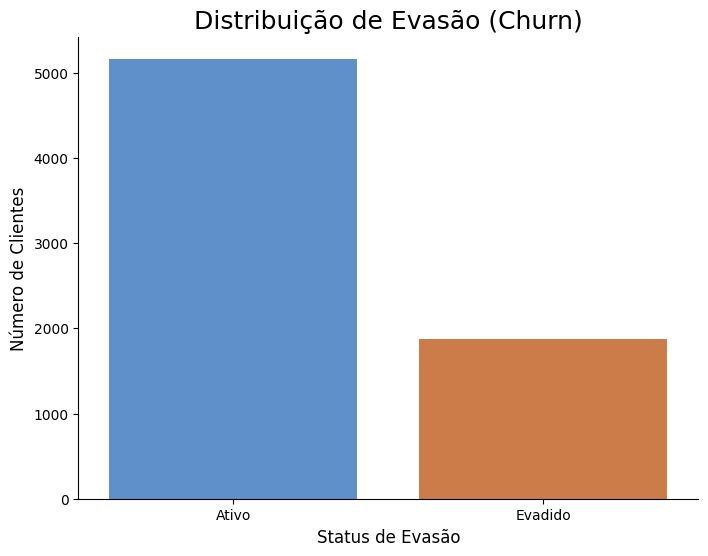


Contagem da Variável Churn:
Churn
No     5163
Yes    1869
Name: count, dtype: int64


In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definir cores para o Churn
churn_colors = ['#4D8EDC', '#E17832']

# Gráfico de Barras (Count Plot) para Churn
plt.figure(figsize=(8, 6)) # Ajuste o tamanho da figura se necessário
sns.countplot(data=dados_encoded, x='Churn', palette=churn_colors)

# Adicionar título e rótulos
plt.title('Distribuição de Evasão (Churn)', fontsize=18)
plt.xlabel('Status de Evasão', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
# Alterar rótulo de legenda em X
plt.xticks(ticks=[0, 1], labels=['Ativo', 'Evadido'])

# Melhorar a aparência (opcional)
plt.xticks(fontsize=10) # Ajustar tamanho das fontes dos ticks do eixo x
plt.yticks(fontsize=10) # Ajustar tamanho das fontes dos ticks do eixo y
sns.despine() # Remover as "espinhas" superiores e da direita do gráfico

# Exibir o gráfico
plt.show()

# Imprimir as contagens exatas para referência
print("\nContagem da Variável Churn:")
print(dados_encoded['Churn'].value_counts())

Analisando a distribuição de Churn por variáveis categóricas/binárias...


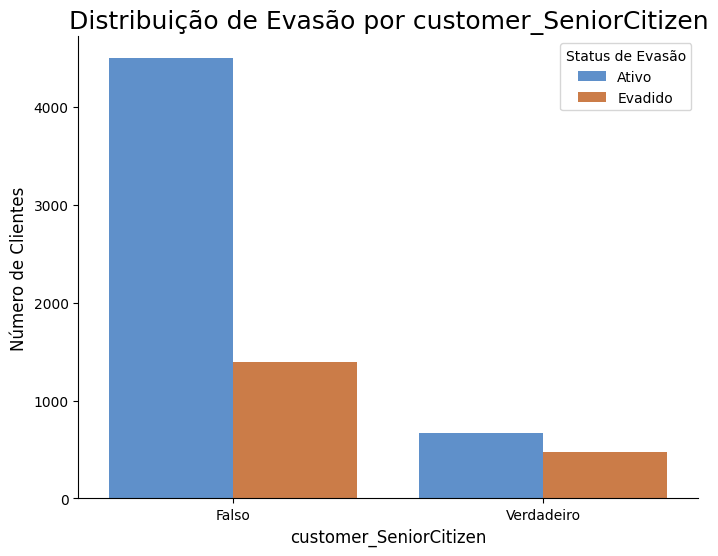


Tabela de Frequência para Churn vs customer_SeniorCitizen:
Churn                   Ativo  Evadido
customer_SeniorCitizen                
False                    4497     1393
True                      666      476
----------------------------------------


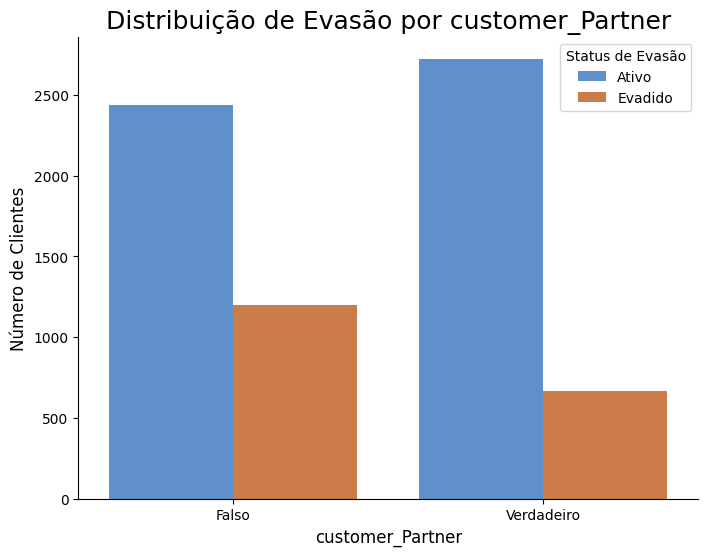


Tabela de Frequência para Churn vs customer_Partner:
Churn             Ativo  Evadido
customer_Partner                
False              2439     1200
True               2724      669
----------------------------------------


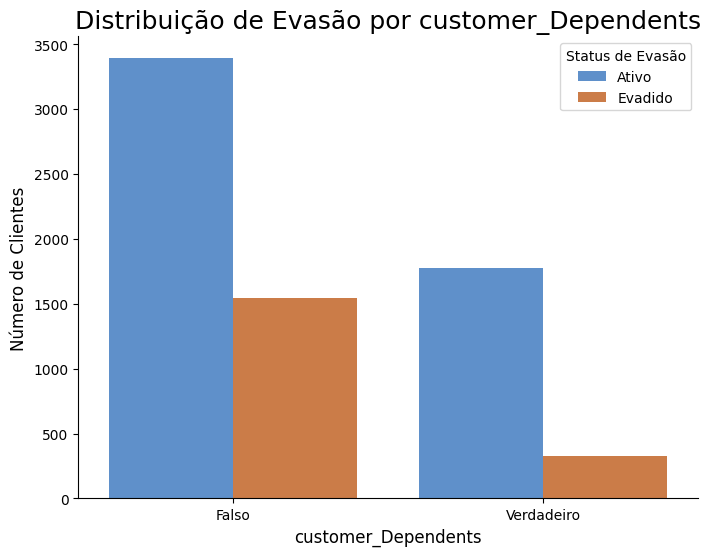


Tabela de Frequência para Churn vs customer_Dependents:
Churn                Ativo  Evadido
customer_Dependents                
False                 3390     1543
True                  1773      326
----------------------------------------


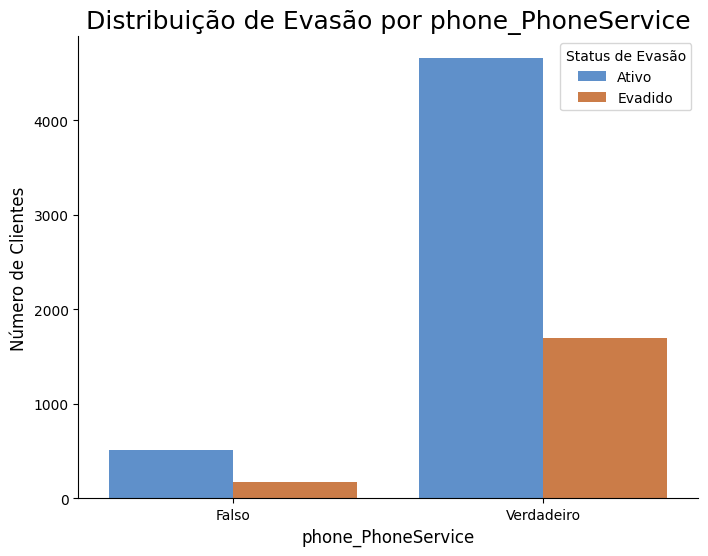


Tabela de Frequência para Churn vs phone_PhoneService:
Churn               Ativo  Evadido
phone_PhoneService                
False                 510      170
True                 4653     1699
----------------------------------------


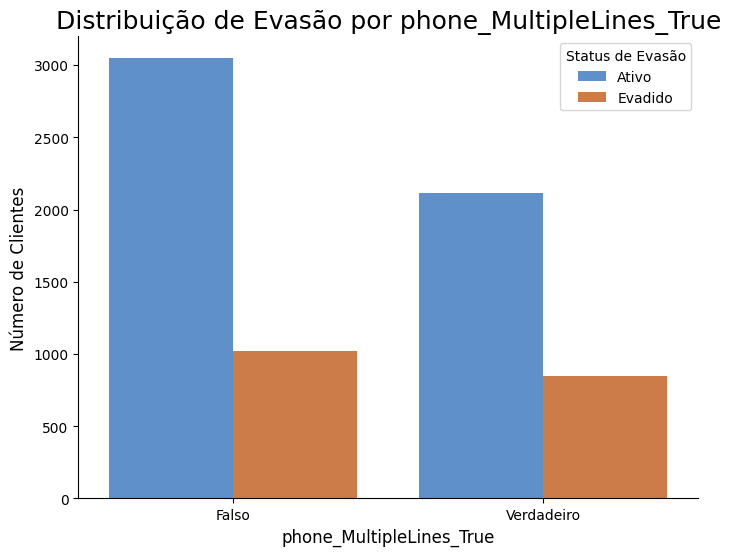


Tabela de Frequência para Churn vs phone_MultipleLines_True:
Churn                     Ativo  Evadido
phone_MultipleLines_True                
False                      3046     1019
True                       2117      850
----------------------------------------


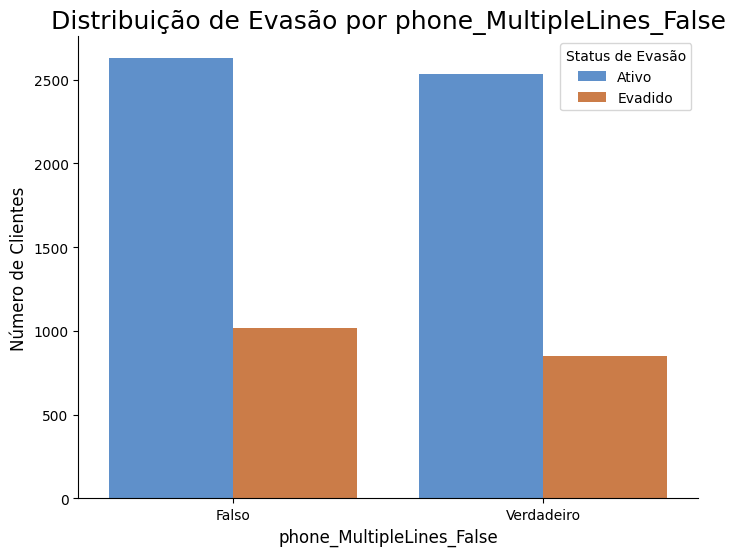


Tabela de Frequência para Churn vs phone_MultipleLines_False:
Churn                      Ativo  Evadido
phone_MultipleLines_False                
False                       2627     1020
True                        2536      849
----------------------------------------


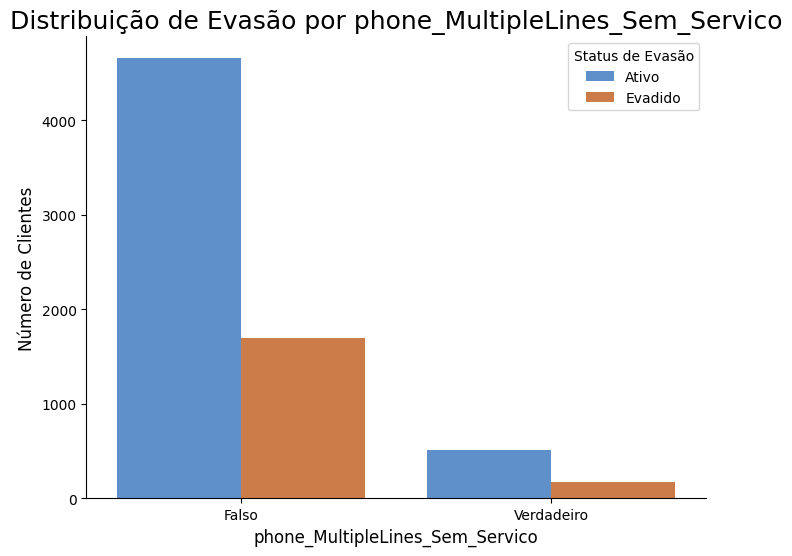


Tabela de Frequência para Churn vs phone_MultipleLines_Sem_Servico:
Churn                            Ativo  Evadido
phone_MultipleLines_Sem_Servico                
False                             4653     1699
True                               510      170
----------------------------------------


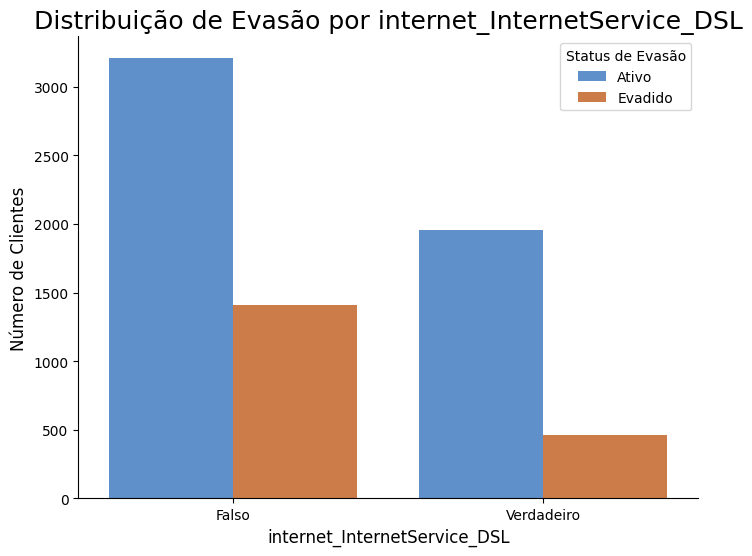


Tabela de Frequência para Churn vs internet_InternetService_DSL:
Churn                         Ativo  Evadido
internet_InternetService_DSL                
False                          3206     1410
True                           1957      459
----------------------------------------


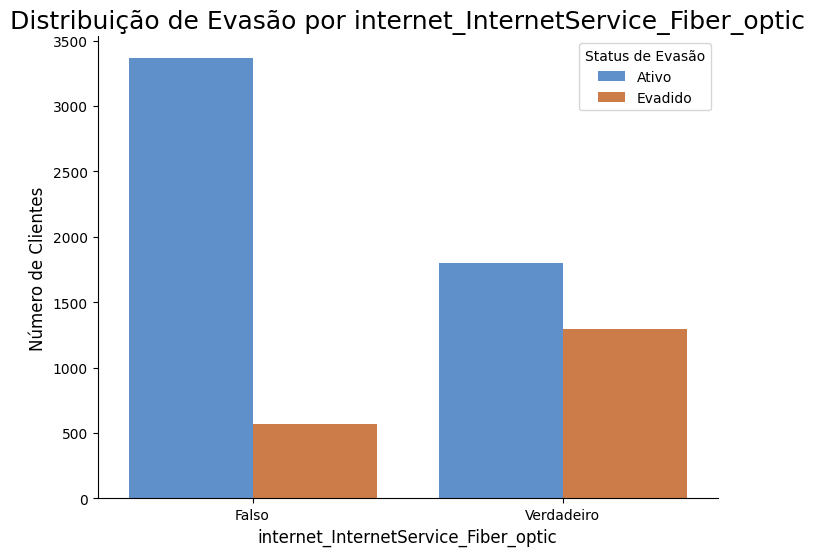


Tabela de Frequência para Churn vs internet_InternetService_Fiber_optic:
Churn                                 Ativo  Evadido
internet_InternetService_Fiber_optic                
False                                  3364      572
True                                   1799     1297
----------------------------------------


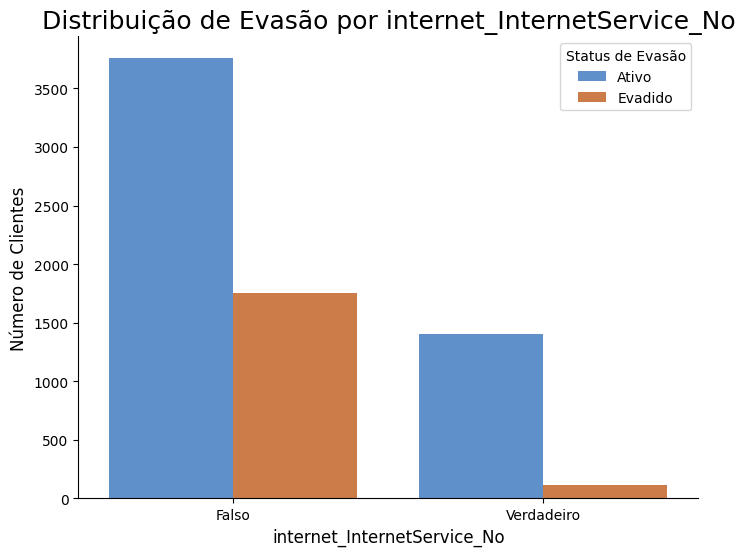


Tabela de Frequência para Churn vs internet_InternetService_No:
Churn                        Ativo  Evadido
internet_InternetService_No                
False                         3756     1756
True                          1407      113
----------------------------------------


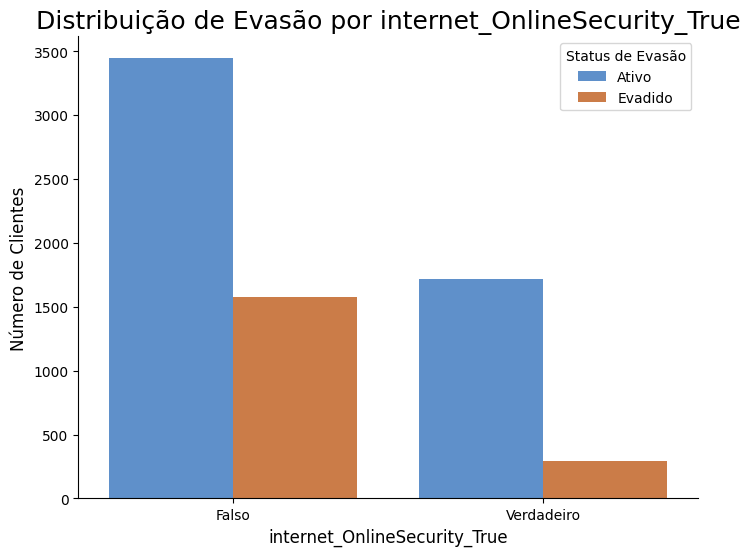


Tabela de Frequência para Churn vs internet_OnlineSecurity_True:
Churn                         Ativo  Evadido
internet_OnlineSecurity_True                
False                          3443     1574
True                           1720      295
----------------------------------------


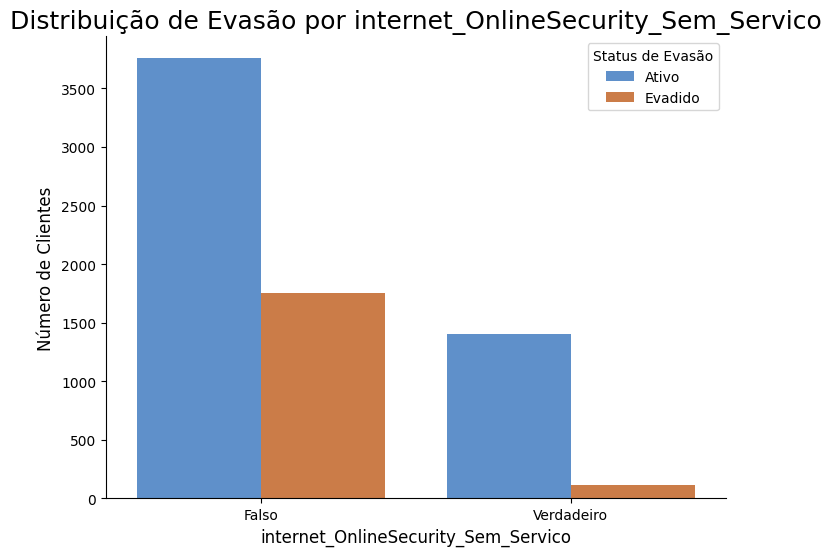


Tabela de Frequência para Churn vs internet_OnlineSecurity_Sem_Servico:
Churn                                Ativo  Evadido
internet_OnlineSecurity_Sem_Servico                
False                                 3756     1756
True                                  1407      113
----------------------------------------


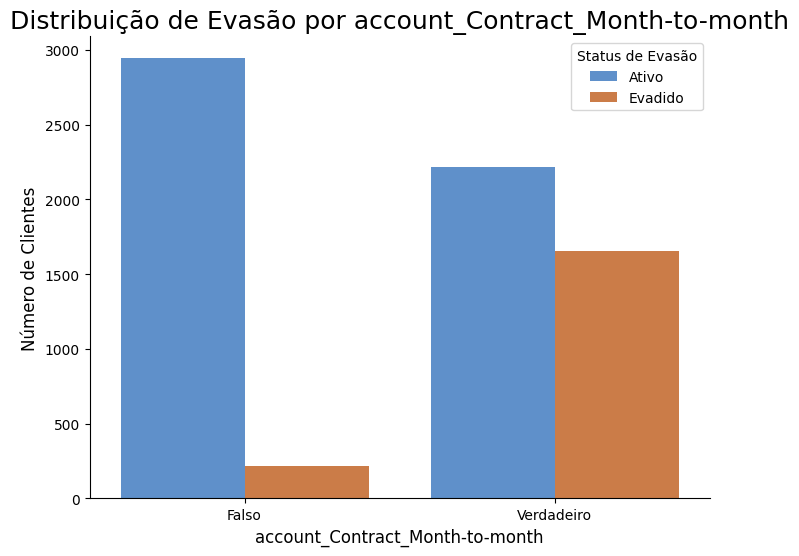


Tabela de Frequência para Churn vs account_Contract_Month-to-month:
Churn                            Ativo  Evadido
account_Contract_Month-to-month                
False                             2943      214
True                              2220     1655
----------------------------------------


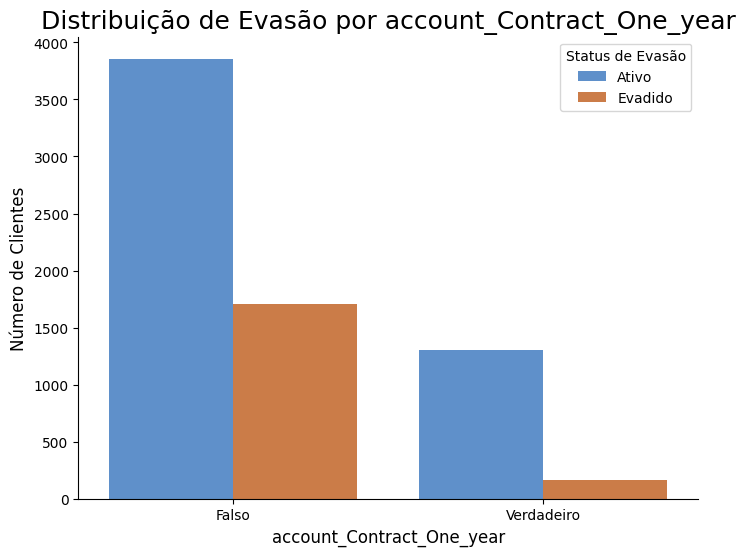


Tabela de Frequência para Churn vs account_Contract_One_year:
Churn                      Ativo  Evadido
account_Contract_One_year                
False                       3857     1703
True                        1306      166
----------------------------------------


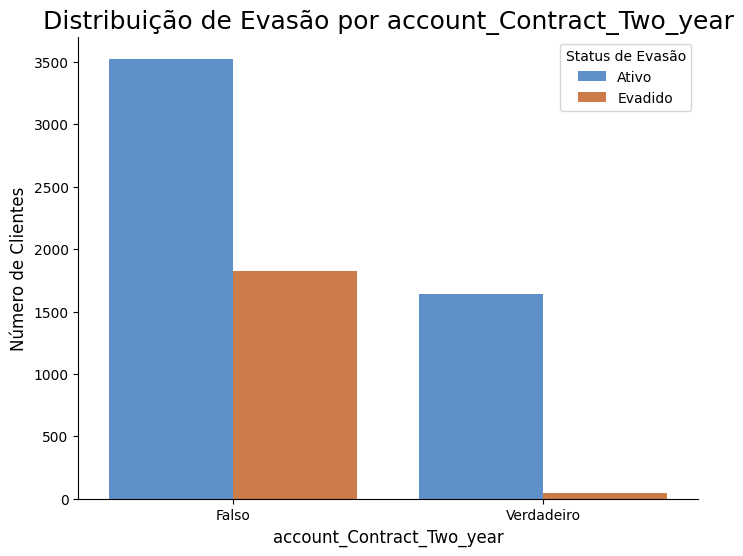


Tabela de Frequência para Churn vs account_Contract_Two_year:
Churn                      Ativo  Evadido
account_Contract_Two_year                
False                       3526     1821
True                        1637       48
----------------------------------------


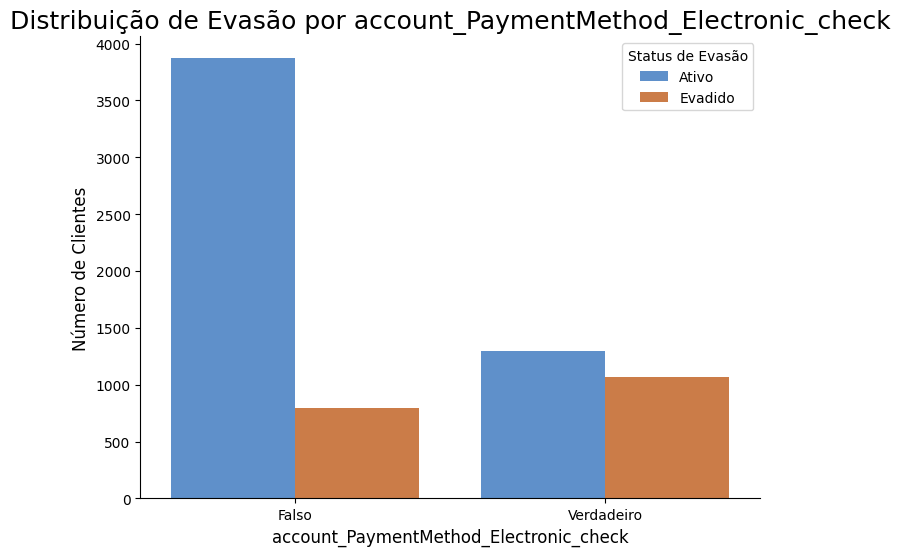


Tabela de Frequência para Churn vs account_PaymentMethod_Electronic_check:
Churn                                   Ativo  Evadido
account_PaymentMethod_Electronic_check                
False                                    3869      798
True                                     1294     1071
----------------------------------------


In [70]:
# Mapear os valores 'No' e 'Yes' na coluna 'Churn' para 'Ativo' e 'Evadido'
# Crie uma cópia para não modificar o DataFrame original se precisar dos rótulos originais mais tarde
dados_encoded_renomeado_churn = dados_encoded.copy()
dados_encoded_renomeado_churn['Churn'] = dados_encoded_renomeado_churn['Churn'].map({'No': 'Ativo', 'Yes': 'Evadido'})

# Definir cores para o Churn (consistente com o gráfico anterior)
# Adapte as cores se necessário para 'Ativo' e 'Evadido'
churn_colors_renomeado = ['#4D8EDC', '#E17832'] # Exemplo: Azul para 'Ativo', Laranja para 'Evadido'

# Lista de colunas categóricas/binárias para analisar em relação ao Churn
# Usaremos as colunas one-hot encoded e algumas binárias originais
churn_vs_categorical_cols = [
    'customer_SeniorCitizen', # Binária original
    'customer_Partner',       # Binária original
    'customer_Dependents',    # Binária original
    'phone_PhoneService',     # Binária original
    'phone_MultipleLines_True', # One-Hot: Clientes com MultipleLines
    'phone_MultipleLines_False', # One-Hot: Clientes sem MultipleLines
    'phone_MultipleLines_Sem_Servico', # One-Hot: Clientes sem PhoneService
    'internet_InternetService_DSL',    # One-Hot
    'internet_InternetService_Fiber_optic', # One-Hot
    'internet_InternetService_No',     # One-Hot: Clientes sem Internet
    'internet_OnlineSecurity_True',    # One-Hot: Clientes com Online Security
    'internet_OnlineSecurity_Sem_Servico', # One-Hot: Clientes sem Online Security ou sem Internet
    # Adicione outras colunas de serviço de internet e métodos de pagamento similarmente
    'account_Contract_Month-to-month', # One-Hot
    'account_Contract_One_year',     # One-Hot
    'account_Contract_Two_year',     # One-Hot
    'account_PaymentMethod_Electronic_check', # One-Hot (exemplo de um método comumente associado a churn)
    # Adicione outras colunas de PaymentMethod e serviços de internet adicionais
]

print("Analisando a distribuição de Churn por variáveis categóricas/binárias...")

for col in churn_vs_categorical_cols:
    plt.figure(figsize=(8, 6)) # Ajuste o tamanho da figura conforme necessário
    # Use o DataFrame renomeado aqui
    sns.countplot(data=dados_encoded_renomeado_churn, x=col, hue='Churn', palette=churn_colors_renomeado)

    # Adicionar título e rótulos
    plt.title(f'Distribuição de Evasão por {col}', fontsize=18)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Número de Clientes', fontsize=12)

    # A legenda será criada automaticamente pelo 'hue', usando os novos rótulos 'Ativo' e 'Evadido'
    plt.legend(title='Status de Evasão')

    # Melhorar a aparência (opcional)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    # --- Alterar rótulos do eixo X para 'Falso' e 'Verdadeiro' para colunas binárias ---
    # Verifica se a coluna é binária (tem 2 valores únicos) e não é 'customerID'
    if dados_encoded_renomeado_churn[col].nunique() == 2 and col != 'customerID':
         # Obtém os valores únicos para garantir a ordem correta
         unique_values = sorted(dados_encoded_renomeado_churn[col].unique())
         if unique_values == [0, 1]: # Se os valores são 0 e 1 (one-hot encoded)
              plt.xticks(ticks=[0, 1], labels=['Falso', 'Verdadeiro'])
         elif unique_values == [False, True]: # Se os valores são False e True (booleanos originais)
              plt.xticks(ticks=[0, 1], labels=['Falso', 'Verdadeiro'])
         # Adicione outros casos se houver colunas binárias com outros valores (embora improvável aqui)

    # Para colunas com mais de 2 categorias (como as que vieram do one-hot com 'Sem Serviço'),
    # os rótulos já devem refletir os nomes das categorias ('True', 'False', 'Sem Serviço').
    # Se precisar renomear esses rótulos também, uma abordagem similar pode ser aplicada
    # verificando o número de valores únicos e seus nomes.


    sns.despine()

    plt.show()

    # Opcional: Imprimir tabelas de frequência para obter os números exatos
    print(f"\nTabela de Frequência para Churn vs {col}:")
    print(pd.crosstab(dados_encoded_renomeado_churn[col], dados_encoded_renomeado_churn['Churn']))
    print("-" * 40)

#📄Relatorio Final